## Homework 1

This is due on Thurs, 6/1

1. Consider the polynomial $p(x) = (x-2)^9 = x^9 - 18x^8 + 144x^7 - 672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512$

  a. Plot $p(x)$ for $x=1.920,\,1.921,\,1.922,\ldots,2.080$ evaluating $p$ via its coefficients $1,\,,-18,\,144,\ldots$

  b. Plot the same plot again, now evaluating $p$ via the expression $(x-2)^9$.

  c. Explain the difference.
  
  *(The numpy method linspace will be useful for this)*

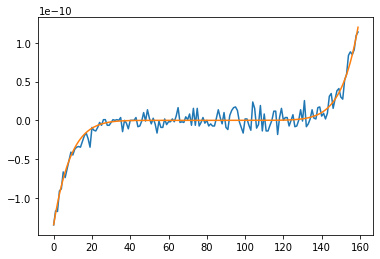

In [10]:
from functools import reduce
%matplotlib inline
from matplotlib import pyplot as plt, rcParams, rc

poly = [lambda x: 𝑥**9, lambda x:-(18 * 𝑥**8), lambda x:144 * 𝑥**7,
       lambda x: -672 * 𝑥**6, lambda x:2016 * 𝑥**5, lambda x:-4032 * 𝑥**4, lambda x:5376 * 𝑥**3,
       lambda x:-4608 * 𝑥**2, lambda x:2304 * 𝑥, lambda x:-512]

def p(x):
    return reduce(lambda x,y: x+y, map(lambda func: func(x), poly)) 

def expressionP(x):
    return (x - 2)**9

plots = list(map(lambda x: p(x/1000), range(1920, 2080,1)))
plt.plot(plots)
expressionPlots = list(map(lambda x: expressionP(x/1000), range(1920, 2080,1)))
plt.plot(expressionPlots)

#The coefficient evalutation has more precision, where the expression
#has less precision as it is more smooth.

2\. How many different double-precision numbers are there?  Express your answer using powers of 2

In [15]:
2**64 - 2**52

18442240474082181120

3\. Using the updated [Numbers Every Programmer Should Know](https://people.eecs.berkeley.edu/~rcs/research/interactive_latency.html), how much longer does a main memory reference take than an L1 cache look-up?  How much longer does a disk seek take than a main memory reference?

In [11]:
mainMemory = 100
L1 = 1
diskSeek = 3000000
print("Main memory cache takes {} times longer than L1 lookup".format(mainMemory/L1))
print("Main memory cache takes {} times longer than L1 lookup".format(diskSeek/mainMemory))

Main memory cache takes 100.0 times longer than L1 lookup
Main memory cache takes 30000.0 times longer than L1 lookup


4\. From the Halide Video, what are 4 ways to traverse a 2d array?

- Scan Line Order: Iterate over the columns of each row before sequentially moving down to the next row.
- Column Major: Iterate over the rows of each column before sequentially moving to the next column.
- Scan Line Order, vectorization: Iterate over the columns of each row in vectors of 4 before sequentially moving down to the next row.
- Recursive Block Splitting: Break the input into blocks and allow for each block to be processed in tile traversal.

5\. Using the animations below ([source](https://www.youtube.com/watch?v=3uiEyEKji0M)), explain what the benefits and pitfalls of each approach. Green squares indicate that a value is being read; red indicates a value is being written. Your answers should be longer in length (give more detail) than just two words.

  a. <img src="images/Halide1.gif" alt="Halide" style="width: 70%"/>
  
  b. <img src="images/Halide2.gif" alt="Halide" style="width: 70%"/>
  
  c. <img src="images/Halide3.gif" alt="Halide" style="width: 70%"/>

- a)It's the most simple solution. However, it quite slow and the resulting output is not worked on until the entire intermediary step is complete.
- b)There is less need to have a lot of memory to store all the intermediary computations of blurred in x. However, it does lead to a lot of repeat work having to rescan the input and recompute the blurred in x for later rows of the output.
- c)There is less repeated work than there was in b, with the same memory advantage. However this approach is not parellelizable and requires that work has already been computed for the outputs preceding it.

6\. Prove that if $A = Q B Q^T$ for some orthnogonal matrix $Q$, the $A$ and $B$ have the same singular values.

- $A = Q \Sigma Q^T$
-  $Q B Q^T$  = $Q \Sigma Q^T$
- $Q \Sigma Q^T$ = $Q \Sigma Q^T $
- $Q^T( Q \Sigma Q^T) = Q^T(Q \Sigma Q^T)$
- $I \Sigma Q^T = I\Sigma Q^T$
- $( \Sigma Q^T)Q = (\Sigma Q^T)Q$
- $\Sigma I = \Sigma I$
- $\Sigma = \Sigma$

7\. What is the *stochastic* part of *stochastic gradient descent*?

- It is the part where the data that is used to determine the error is a randomly selected smaller subset of the entire data set.